# Mouvement rétrograde de Mars



![2014-2016-mars-retrograde-earth-night-sky-samples.jpg](./2014-2016-mars-retrograde-earth-night-sky-samples.jpg)

*image from https://mars.nasa.gov/all-about-mars/night-sky/retrograde/*

# Contexte

Si l'on regarde la position de Mars depuis la Terre on remarque que tous les deux ans Mars fait une sorte de demi-tour puis repart dans le même sens. Ce mouvement est appelé la rétrograde de Mars.


Le mini-projet a pour objectif de créer un modèle de ce phénomène puis de le comparer aux valeurs expérimentales.

Pour le modèle on considère les trajectoires de la Terre et de Mars comme étant circulaires et uniformes et contenues dans un plan.

Pour réaliser ce mini-projet on réalise d'abord le graphique de la longitude de Mars vue depuis la Terre via les valeurs expérimentales. On calcule ensuite cette même longitude en utilisant le modèle physique. Il faut tracé ces deux longitudes ainsi que leur écart pour les comparer.

## Données

Le fichier DataMars.csv contient les coordonnées (longitude et latitude) de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017. Notons que la latitude est définie ici par rapport au plan de l'écliptique. 

Le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°.



>**NOTE**  
>Pour lire fichier csv, on peut utiliser la fonction `read_csv` du module Pandas, en utilisant l'option `comment = '#'`


*(DataMars.csv a été construit à partir des données de http://vo.imcce.fr/webservices/miriade/?forms)*


## Modèle

Vous allez utiliser un modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil. On considérera le mouvement des deux planètes comme circulaire uniforme et contenu dans le plan de l'écliptique.

![solar.png](solar.png)

Ce modèle vous permettra de calculer la longitude de Mars vue depuis la Terre (i.e. l'angle $\phi_{app}$ dans le réferentiel géocentrique) en fonction du temps.

>**NOTE**  
>La fonction `numpy.arctan(y / x)` donnant un résultat entre $-\frac{\pi}{2}$ et $\frac{\pi}{2}$, nous vous conseillons de lui préférer la fonction `numpy.arctan2(y, x)` qui donne un résultat entre $-\pi$ et $\pi$.

Vous pourrez ensuite comparer le modèle (longitude calculée) aux données astronomiques (longitude mesurée).

>**INDICE**  
>Le mouvement rétrograde apparent s'observe quand, dans le réferentiel héliocentrique, la Terre "dépasse" Mars. Au "milieu" du mouvement rétrograde la Terre et Mars sont donc dans la même direction par rapport au Soleil (Soleil, Terre et Mars sont alignés). En choisissant judiciseusement la date $t=0$ et la phase à l'origine pour les deux planètes, on peut faire coïncider le modèle aux données à cet instant.


### Grandeurs utiles :

Rayon de l'orbite de la Terre : 1 UA  
Période de révolution de la Terre : 365.256 jours  
Rayon de l'orbite de Mars : 1.52371 UA  
Période de révolution de Mars : 686.885 jours


## Méthodes

Vous allez utiliser une représentation graphique pour illustrer votre modèle. Pour cela, il faut représenter sur un graphique à la fois les données et le modèle. Vous prendrez un soin particulier pour que le graphique soit lisible et compréhensible.

Voici un exemple de représentation graphique :

# Equation du mouvement circulaire uniforme

### Equation de la position

$x(t) = R.\cos(\omega * t + \phi)$


$y(t) = R.\sin(\omega * t + \phi)$

### Vitesse angulaire

$\omega = \dfrac {2*\pi}{T}$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importation des bibliothèques

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Création du graphique de la longitude de Mars vue depuis la Terre par données expérimentales

### Création du DataFrame des données

In [15]:
#lecturte du ficher 
pd.read_csv('DataMars.csv', comment = '#')

#creation du DataFrame des données 
df_data = pd.read_csv('DataMars.csv', comment = '#')


On cherche à créer un DataFrame qui à pour valeur centrale la longitude du centre de la boucle soit 204.5°. Cela arrive le 25 mai 2016

creation du DataFrame des données entre le `jour_1` et le `jour_2`

In [16]:
jour_1 = 299 # 25 décembre 2015
jour_1 = 299 # 25 décembre 2016

In [17]:
jour_1 = 221 # 25 décembre 2015
jour_1 = 299 # 25 décembre 2016

In [18]:


# et le 24 octobre 2016
df_mars = df_data.iloc[299:604, [1, 3]]

print(df_mars)

           Date  Longitude (decimal)
299  2015-12-25           204.413279
300  2015-12-26           204.977212
301  2015-12-27           205.539953
302  2015-12-28           206.101479
303  2015-12-29           206.661768
..          ...                  ...
599  2016-10-20           285.197792
600  2016-10-21           285.902659
601  2016-10-22           286.609245
602  2016-10-23           287.317528
603  2016-10-24           288.027488

[305 rows x 2 columns]


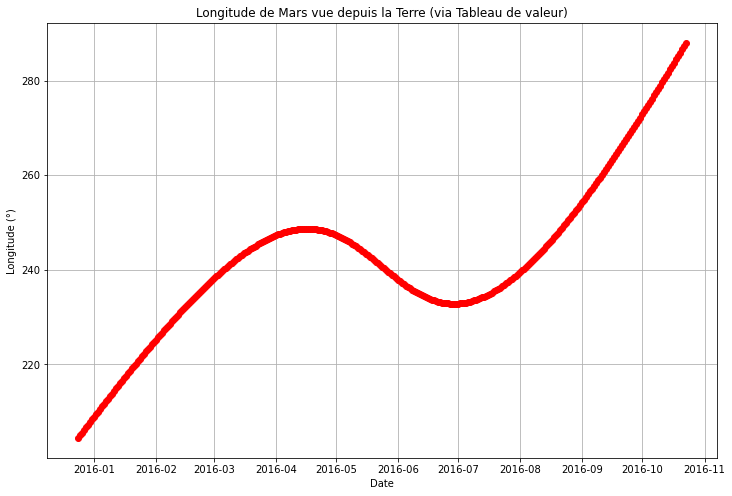

In [19]:
#extraction de la colonne de la longitude
col_longitude = df_mars['Longitude (decimal)']

#tableau des dates
liste_dates = np.arange('2015-12-24', '2016-10-24', dtype = 'datetime64[D]') 
dates = np.array(liste_dates)

#creation du dictionnaire dates
dic_dates ={'date': dates}

#creation du DataFrame
df_dates = pd.DataFrame(data = dic_dates)

#extraction de la colonne des dates
col_date = df_dates['date']

#Représentation graphique 
plt.figure(figsize=(12,8))
plt.plot(col_date, col_longitude, 'o', color = 'r')
plt.title('Longitude de Mars vue depuis la Terre (via Tableau de valeur)')
plt.xlabel ('Date')
plt.ylabel ('Longitude (°)')
plt.grid()


In [20]:
times=[1,2,3]
for time in times:
    print(time)

1
2
3


# Création du modèle physique de la longitude de Mars vue depuis la Terre

### Calcul des constantes

In [5]:
#création des constantes
r_terre = 149597870691 #m
r_mars = 227943771550.6 #m
T_terre = 31558118.4 #s
T_mars = 59346864 #s

#calcul de omega
ω_terre = (2*np.pi)/T_terre
ω_mars = (2*np.pi)/T_mars


### Création du tableau du temps

In [6]:
#calcul de la durée nécessaire 
duree = np.datetime64('2016-10-24') - np.datetime64('2015-12-24')
print(duree)

305 days


In [7]:
#discrétisation
t_i = -13176000 #s
t_f = 13176000 - 86400 #s 
pas_temps = 86400 #s #une journée

#création du tableau de temps 
intervale = t_f - t_i
num_point = int(intervale/pas_temps)+1
t = np.linspace(t_i, t_f, num_point)


### Calcul de la position de Mars et de la Terre

In [9]:
#position de Mars et de la Terre
x_terre = r_terre * np.cos(ω_terre * t + 0)
x_mars = r_mars * np.cos(ω_mars * t + 0)

y_terre = r_terre * np.sin(ω_terre * t + 0)
y_mars = r_mars * np.sin(ω_mars * t + 0)


### Calcul de la longitude de Mars vue depuis la Terre

On doit convertir la longitude en degrée pour cela on multiplie par $\dfrac {180}{\pi}$ . 

De plus on doit ajouter 240.5 degrées à la valeur de $\phi$ pour correspondre avec les valeur expérimentales

In [10]:
#calcul de l'angle 
Φ_app = 240.5 + np.arctan2((y_mars - y_terre), (x_mars - x_terre))*180/np.pi

### Représentation graphique du model

Text(0, 0.5, 'Longitude (°)')

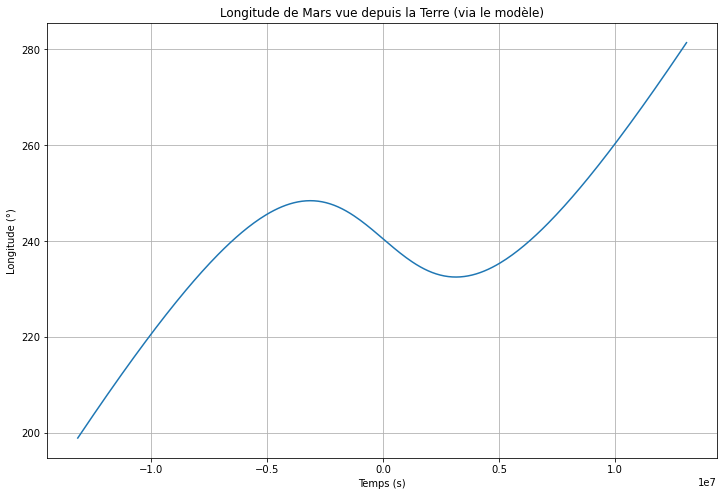

In [11]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(t, Φ_app)
plt.title('Longitude de Mars vue depuis la Terre (via le modèle)')
plt.xlabel('Temps (s)')
plt.ylabel('Longitude (°)')

# Comparaison des deux courbes

Pour ne pas avoir de problème de conversion entre la liste de temps et le DataFrame qui est en DateTime64, un DataFrame du calcul de $\phi$ est créé

In [12]:
#creation du tableau numpy Φ_app
np_Φ_app = np.array(Φ_app)

#creation du dictionaire 
dic_model = {'date': dates, 'longitude' : np_Φ_app}

#creation du dataframe
df_model = pd.DataFrame(data = dic_model)

#extraire la colonne de longitude du dataframe du model
col_longitude_model = df_model['longitude']


NameError: name 'dates' is not defined

### Représentation graphique de la courbe issue des valeurs expérimentale et de la courbe issue du modèle

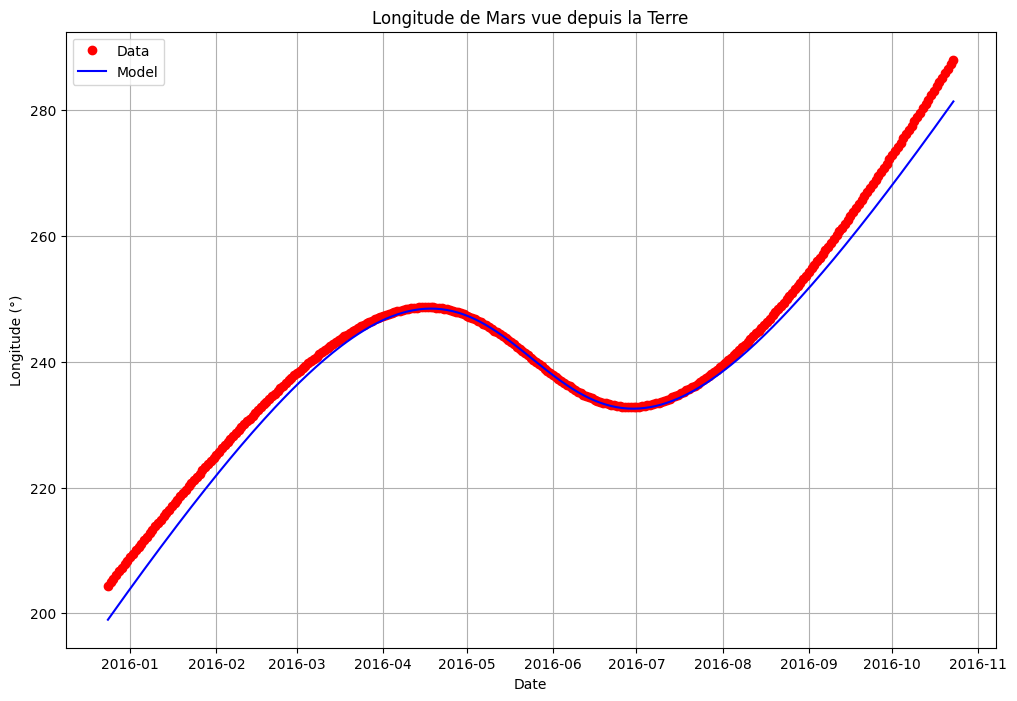

In [13]:
#tracée des deux courbes
plt.figure(figsize=(12,8))
plt.plot(col_date, col_longitude,'o', label = 'Data', color = 'r')
plt.plot(col_date, col_longitude_model, label = 'Model', color = 'b')

#Légende et autres
plt.grid()
plt.title('Longitude de Mars vue depuis la Terre')
plt.xlabel('Date')
plt.ylabel('Longitude (°)')
plt.legend()
plt.show()

### Ecart entre les valeurs expérimentales et le modèle

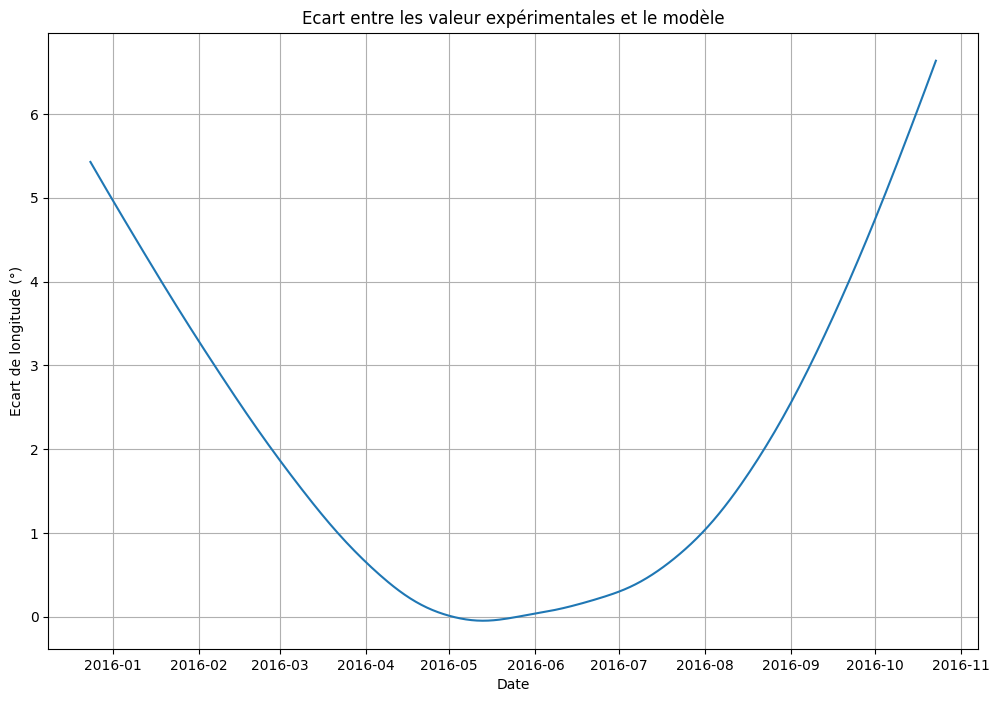

In [14]:
#conversion des colonnes des DataFrame en numpy array
np_lon = df_mars['Longitude (decimal)'].to_numpy()
np_lon_model = df_model['longitude'].to_numpy()

#écart entre les deux longitudes
ecart = np_lon - np_lon_model

#tracée de la courbes d'écart
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(col_date, ecart)

#legende et autres
plt.title('Ecart entre les valeur expérimentales et le modèle')
plt.xlabel('Date')
plt.ylabel('Ecart de longitude (°)')
plt.show()

# Résumé

On a tracé le graphique de la longitude de Mars vue depuis la Terre via les données expérimentales sur la période de temps où le mouvement de rétrograde s'effectue. On a ensuite calculé les positions de Mars et de la Terre grâce au modèle et on les a utilisé pour calculer la longitude de Mars vue depuis la Terre puis pour la représenter graphiquement. On a donc pu tracer ces deux longitudes sur le même graphique. On a finit par calculer l'écart entre les valeurs expérimentales et le modèle puis on la tracé.

# Commentaire

En comparant les courbes on remarque que le modèle utilisé est très proche des valeurs expérimentales lorsque l'on se situe durant le mouvement de rétrograde.
En dehors du mouvement de rétrograde le modèle s'éloigne des valeurs expérimentales. Cela peut être dû au fait que l'on a considéré les mouvments de Mars et de la Terre comme étant circulaire uniforme.

On peut améliorer ce modèle en évitant de considérer le mouvement circulaire uniforme et utiliser une orbite elliptique.